In [2]:
!pip install --upgrade --editable ../gym-env

Obtaining file:///C:/Users/shive/OneDrive/Desktop/Sem%205/CS698/ForagingReplenishingPatches/gym-env
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: gym-env
    Found existing installation: gym-env 1.0.0
    Uninstalling gym-env-1.0.0:
      Successfully uninstalled gym-env-1.0.0
  Running setup.py develop for gym-env


In [1]:
import gym
import gym_env
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

env = gym.make('foraging-replenishing-patches-v0')

env.reset()
for i in range(300):
    action = np.random.randint(9)
    state, reward, done, _ = env.step(action)
    print(action, state, reward, done)
    if done:
        break

4 4 0 False
7 7 0 False
7 7 0 False
6 6 0 False
5 5 0 False
7 7 0 False
1 1 0 False
0 0 0 False
7 7 0 False
2 2 0 False
3 3 0 False
5 5 0 False
2 2 0 False
4 4 0 False
0 0 0 False
5 5 0 False
5 5 0 False
4 4 0 False
6 6 0 False
7 7 0 False
4 4 0 False
5 5 0 False
2 2 0 False
6 6 0 False
0 0 0 False
6 6 0 False
5 5 0 False
7 7 0 False
8 7 0 False
1 1 0 False
8 1 63.0 False
5 5 63.0 False
4 4 63.0 False
1 1 63.0 False
8 1 119.7 False
3 3 119.7 False
0 0 119.7 False
3 3 119.7 False
5 5 119.7 False
5 5 119.7 False
5 5 119.7 False
7 7 119.7 False
2 2 119.7 False
6 6 119.7 False
5 5 119.7 False
0 0 119.7 False
8 0 119.7 False
7 7 119.7 False
3 3 119.7 False
7 7 119.7 False
3 3 119.7 False
3 3 119.7 False
7 7 119.7 False
0 0 119.7 False
6 6 119.7 False
1 1 119.7 False
1 1 119.7 False
2 2 119.7 False
7 7 119.7 False
8 7 119.7 False
0 0 119.7 False
5 5 119.7 False
3 3 119.7 False
3 3 119.7 False
4 4 119.7 False
5 5 119.7 False
5 5 119.7 False
6 6 119.7 False
7 7 119.7 False
2 2 119.7 False
7 7 

In [2]:
def pureGreedy(env,maxEpisodes, maxTime=300, optimistic=True, forgetDecay=0.5):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  if optimistic == True:
    Q = np.ones(env.action_space.n-1)*10**4

  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
        a = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))
        s, r, terminal, info = env.step(a)
        s, r, terminal, info = env.step(8)
        N[a] += 1
        Q[a] += (r-reward-Q[a])/N[a]
        Q *= (1-forgetDecay)
        Q[a] /= (1-forgetDecay)
        reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [11]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = pureGreedy(env=genv, maxEpisodes=50, optimistic=True)
print(rs)

[528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001]


In [12]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = pureGreedy(env=genv, maxEpisodes=50, optimistic=False)
print(rs)

[528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001, 528.3000000000001]


100%|██████████| 5/5 [05:42<00:00, 68.48s/it]


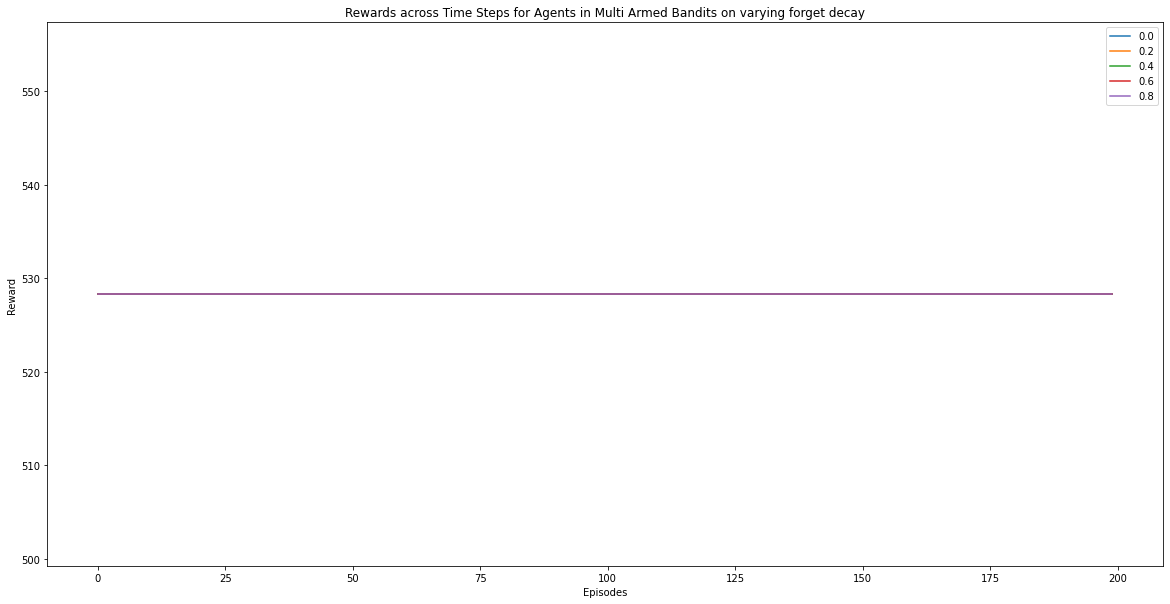

In [15]:
for i in tqdm(range(0,10,2)):
  RS = []
  for _ in range(5):
    genv = gym.make('foraging-replenishing-patches-v0')
    genv.reset()
    _,rs = pureGreedy(env=genv, maxEpisodes=200, optimistic=False, forgetDecay=i/10)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for Agents in Multi Armed Bandits on varying forget decay")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(200), np.mean(RS,axis=0), label=str(i/10))
  plt.legend()

plt.show()

In [3]:
def pureExplore(env,maxEpisodes, maxTime=300, forgetDecay=0.5):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
        a = np.random.randint(env.action_space.n-1)
        s, r, terminal, info = env.step(a)
        s, r, terminal, info = env.step(8)
        N[a] += 1
        Q[a] += (r-reward-Q[a])/N[a]
        Q *= (1-forgetDecay)
        Q[a] /= (1-forgetDecay)
        reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [17]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = pureExplore(env=genv, maxEpisodes=50)
print(rs)

[4986.9, 5615.0999999999985, 3987.8999999999996, 5816.699999999998, 4731.299999999999, 4099.5, 4523.399999999999, 4319.1, 4283.099999999999, 4337.999999999999, 5204.7, 5184.9, 4303.799999999998, 5038.200000000002, 4418.099999999999, 5047.2, 4908.6, 5245.199999999999, 4985.100000000001, 4211.099999999999, 4116.6, 4964.4, 4300.2, 3474.9, 3438.8999999999996, 4043.7000000000003, 4113.899999999999, 4774.500000000001, 5036.400000000002, 3869.1000000000004, 4715.099999999999, 5204.700000000001, 4273.200000000001, 4819.500000000003, 4755.599999999998, 4501.8, 5049.0, 5210.999999999999, 4787.1, 4375.800000000001, 4289.399999999999, 4048.2, 4996.800000000001, 4059.0000000000005, 3987.8999999999996, 5136.3, 4340.7, 4112.099999999999, 4294.799999999998, 4292.1]


100%|██████████| 5/5 [00:38<00:00,  7.74s/it]


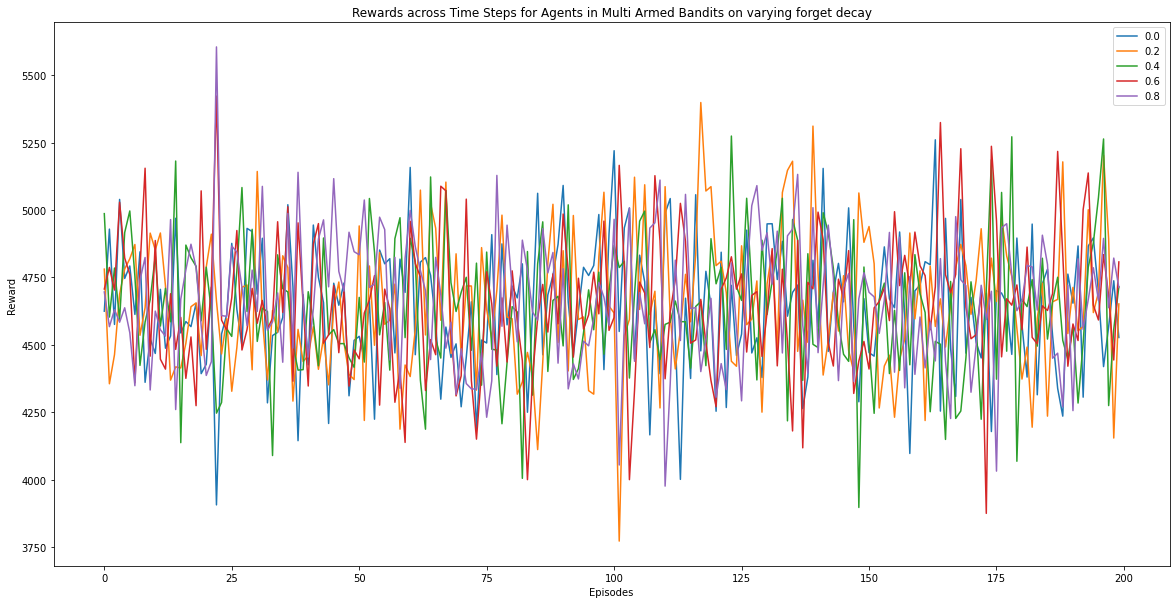

In [18]:
for i in tqdm(range(0,10,2)):
  RS = []
  for _ in range(5):
    genv = gym.make('foraging-replenishing-patches-v0')
    genv.reset()
    _,rs = pureExplore(env=genv, maxEpisodes=200, maxTime=300, forgetDecay=i/10)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for Agents in Multi Armed Bandits on varying forget decay")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(200), np.mean(RS,axis=0), label=str(i/10))
  plt.legend()

plt.show()

In [4]:
def epsGreedy(env,eps, maxEpisodes,maxTime=300, forgetDecay=0.5):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
        if np.random.rand(1) < eps:
            a = np.random.randint(env.action_space.n-1)
        else:
            a = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))        
        s, r, terminal, info = env.step(a)
        s, r, terminal, info = env.step(8)
        N[a] += 1
        Q[a] += (r-reward-Q[a])/N[a]
        Q *= (1-forgetDecay)
        Q[a] /= (1-forgetDecay)        
        reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [20]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = epsGreedy(env=genv, eps=0.3, maxEpisodes=50)
print(rs)

[10660.500000000002, 10892.700000000003, 5742.000000000001, 10087.200000000003, 10777.500000000002, 8532.900000000003, 8763.300000000001, 9593.099999999999, 9662.400000000003, 7169.400000000002, 10357.2, 8211.6, 11062.8, 11568.6, 9526.500000000002, 10639.799999999997, 9933.3, 8978.4, 8537.400000000003, 11056.499999999998, 10858.5, 10278.000000000002, 11264.4, 8255.700000000004, 8258.400000000001, 8614.800000000003, 10013.400000000003, 9595.800000000001, 8925.300000000001, 6570.000000000002, 9020.699999999999, 11348.999999999998, 8365.500000000002, 9554.399999999998, 9249.3, 8574.3, 10007.099999999999, 9425.700000000003, 8750.699999999999, 9463.500000000005, 7782.300000000002, 7411.500000000001, 10013.400000000005, 9245.699999999999, 9104.4, 10313.100000000004, 8089.200000000002, 8864.1, 8875.800000000001, 8777.700000000003]


In [3]:
def decEpsGreedy(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, forgetDecay=0.5):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))

      if np.random.rand(1) < eps:
        a = np.random.randint(env.action_space.n-1)
      else:
        a = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))
      s, r, terminal, info = env.step(a)
      s, r, terminal, info = env.step(8)
      N[a] += 1
      Q[a] += (r-reward-Q[a])/N[a]
      Q *= (1-forgetDecay+1e-9)
      Q[s] /= (1-forgetDecay+1e-9)
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [22]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = decEpsGreedy(env=genv, maxEpisodes=50, eps_start=1, eps_end=0.1, decayType='linear', decayTill=25)
print(rs)

[4865.400000000001, 5381.100000000001, 5435.1, 6326.999999999999, 5084.1, 6962.400000000001, 5760.900000000001, 8316.0, 6703.2, 6074.099999999999, 7399.799999999997, 8280.000000000004, 6964.2, 8692.199999999997, 8427.599999999999, 10316.699999999995, 10109.699999999997, 8232.300000000003, 10221.3, 9050.400000000001, 7098.300000000001, 9585.0, 8256.600000000004, 6563.699999999999, 4883.4, 4409.1, 6911.099999999999, 6589.800000000001, 5946.300000000001, 6961.500000000003, 6967.800000000004, 6030.900000000002, 6707.700000000003, 6369.299999999999, 7065.0, 7659.000000000004, 6330.600000000001, 6546.6, 6399.9000000000015, 4729.500000000001, 6133.5, 4482.0, 6048.9, 8426.700000000004, 6544.800000000001, 8016.300000000002, 8394.3, 7049.7000000000035, 5755.500000000003, 4404.6]


In [23]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = decEpsGreedy(env=genv, maxEpisodes=50, eps_start=1, eps_end=0.1, decayType='exponential', decayTill=10)
print(rs)

[4936.500000000002, 5841.900000000001, 6735.600000000001, 9520.200000000003, 9981.0, 8609.4, 9265.500000000002, 9778.5, 7982.100000000003, 6309.900000000001, 4330.799999999998, 5357.700000000001, 4601.699999999999, 6206.400000000002, 6393.5999999999985, 7983.900000000002, 8865.900000000003, 6374.700000000001, 6385.500000000002, 6063.300000000001, 6523.200000000003, 5463.899999999998, 6231.600000000003, 7338.600000000002, 6716.699999999999, 5714.100000000001, 4574.7, 4385.7, 6402.600000000001, 7704.900000000001, 4594.5, 8060.400000000003, 6300.900000000002, 7234.200000000001, 6480.9000000000015, 4556.700000000001, 6081.300000000001, 7115.4, 4516.199999999999, 5817.6, 5218.200000000001, 7731.000000000002, 6869.699999999999, 8138.699999999998, 2352.6, 8354.699999999999, 5940.899999999999, 6264.900000000002, 7106.400000000001, 4803.3]


100%|██████████| 5/5 [01:34<00:00, 18.90s/it]


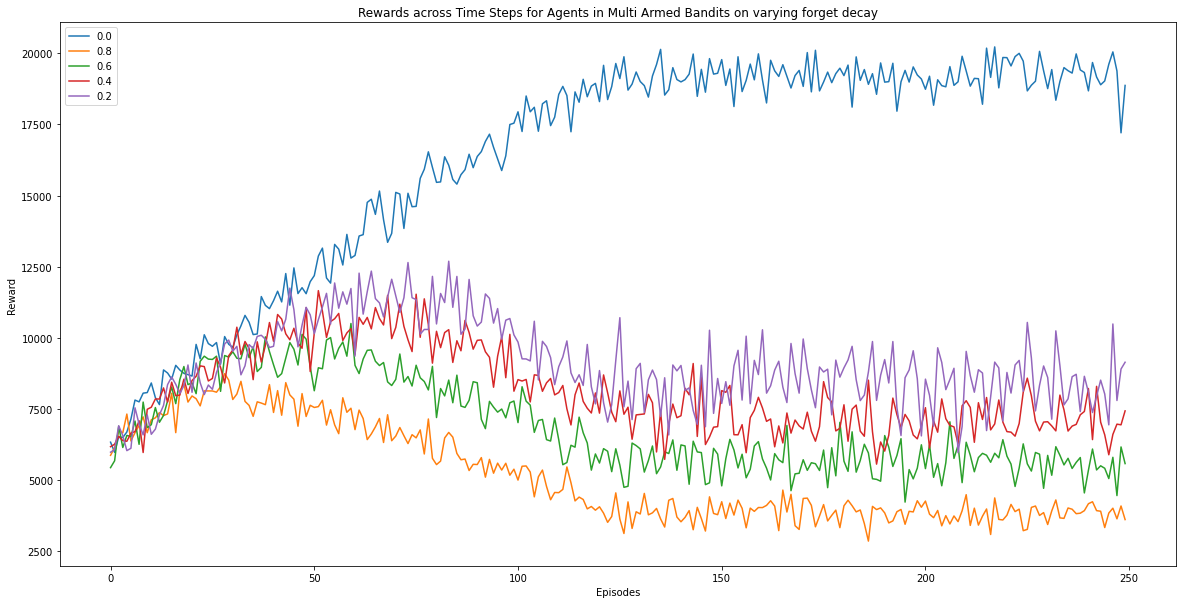

In [6]:
for i in tqdm(range(0,10,2)):
  RS = []
  for _ in range(5):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = decEpsGreedy(env=genv, maxEpisodes=250, eps_start=1, eps_end=0.1, decayType='exponential', maxTime=300, decayTill=125, forgetDecay=(i/10))
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for Agents in Multi Armed Bandits on varying forget decay")
  plt.xlabel('Episodes')
  plt.ylabel('Reward')
  if i==0: 
    plt.plot(np.arange(250), np.mean(RS,axis=0), label=str(i/10))
  else:
    plt.plot(np.arange(250), np.mean(RS,axis=0), label=str(np.round(1-i/10,1)))
  plt.legend()

plt.show()

In [25]:
def UCB(env, maxEpisodes, c, maxTime=300, forgetDecay=0.5):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    count = 0
    while env.time_elapsed < maxTime:
      if count < env.action_space.n-1:
        a = count
      else:
        U = c*np.sqrt(np.log(i+1)/N)
        a = np.random.choice(np.flatnonzero(np.isclose(Q+U, np.max(Q+U))))
      s, r, terminal, info = env.step(a)
      count += 1
      s, r, terminal, info = env.step(8)
      N[a] += 1
      Q[a] += (r-reward-Q[a])/N[a]
      Q *= (1-forgetDecay)
      Q[a] /= (1-forgetDecay)      
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [26]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = UCB(env=genv, maxEpisodes=50, c=0.3, forgetDecay=0.7)
print(rs)

[811.8, 835.2, 835.2, 846.0000000000001, 273.6, 811.8, 273.6, 273.6, 811.8, 273.6, 273.6, 811.8, 273.6, 273.6, 273.6, 835.2, 273.6, 811.8, 273.6, 273.6, 835.2, 846.0000000000001, 273.6, 811.8, 273.6, 273.6, 273.6, 273.6, 273.6, 811.8, 835.2, 846.0000000000001, 273.6, 273.6, 273.6, 273.6, 273.6, 811.8, 835.2, 273.6, 273.6, 273.6, 341.1, 846.0000000000001, 273.6, 811.8, 835.2, 273.6, 273.6, 273.6]


100%|██████████| 5/5 [01:35<00:00, 19.09s/it]


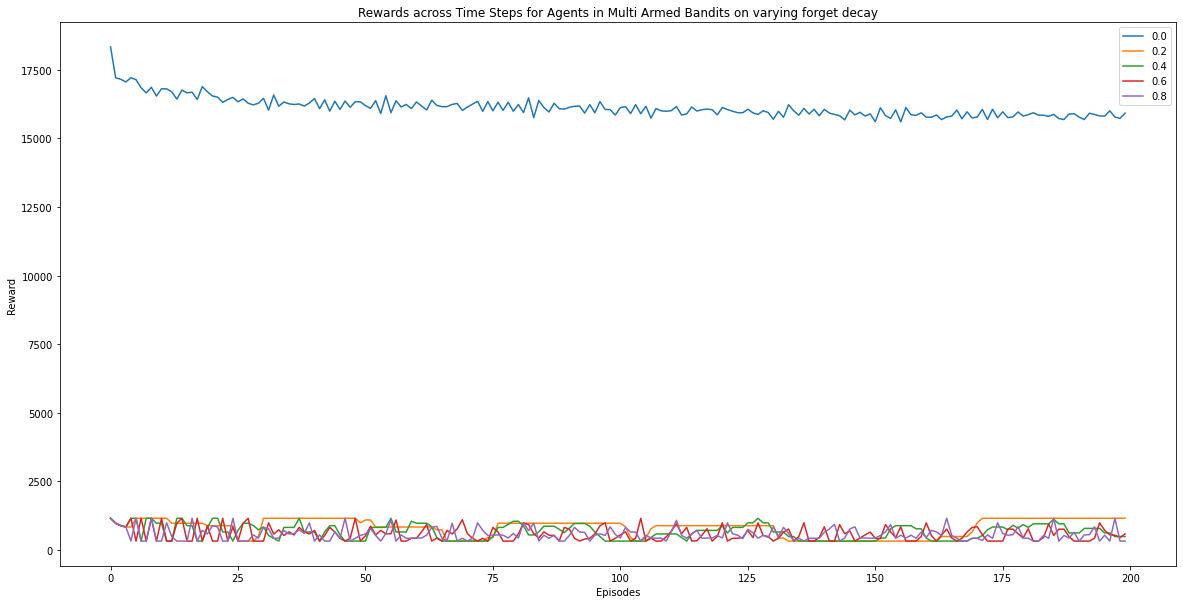

In [27]:
for i in tqdm(range(0,10,2)):
  RS = []
  for _ in range(5):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = UCB(env=genv, maxEpisodes=200, c=0.3, maxTime=300, forgetDecay=i/10)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for Agents in Multi Armed Bandits on varying forget decay")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(200), np.mean(RS,axis=0), label=str(i/10))
  plt.legend()

plt.show()

In [29]:
def AvgRewardsNGaussianBandits(N=50, episodes=10**3, block_type=3, decayTill=200):
    skipFirstN = 0
    pureGreedy_R = []
    pureExplore_R = []
    epsGreedy_R = []
    decExpEpsGreedy_R = []
    decLinEpsGreedy_R = []
    UCB_R = []
    softMax_R = []

    for i in tqdm(range(N)):
        genv = gym.make('foraging-replenishing-patches-v0', block_type=block_type)
        _,rs = pureGreedy(env=genv, maxEpisodes = episodes)
        pureGreedy_R.append(rs)
        _,rs = pureExplore(env=genv, maxEpisodes=episodes)
        pureExplore_R.append(rs)
        _,rs = epsGreedy(env=genv, maxEpisodes=episodes, eps=0.3)
        epsGreedy_R.append(rs)
        _,rs = decEpsGreedy(env=genv, maxEpisodes=episodes, eps_start=1, eps_end=0.1, decayType='exponential', decayTill=decayTill)
        decExpEpsGreedy_R.append(rs)
        _,rs = decEpsGreedy(env=genv, maxEpisodes=episodes, eps_start=1, eps_end=0.1, decayType='linear', decayTill=decayTill)
        decLinEpsGreedy_R.append(rs)
        _,rs = UCB(env=genv, maxEpisodes=episodes, c=0.3)
        UCB_R.append(rs)
        # _,rs = softMax(env=genv, maxEpisodes=episodes, temp_start=10**2, temp_end=0.01)
        # softMax_R.append(rs)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.title("Average Rewards across Time Steps for Agents in Multi Armed Bandits")
    plt.xlabel('Episodes')
    plt.ylabel('Average Reward') 
    plt.plot(np.arange(episodes-skipFirstN), np.mean(pureGreedy_R,axis=0), label='Pure Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(pureExplore_R,axis=0), label='Pure Explore')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(epsGreedy_R,axis=0), label='Eps=0.3 Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(decExpEpsGreedy_R,axis=0), label='Decaying (1->0.1) Exp Eps Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(decLinEpsGreedy_R,axis=0), label='Decaying (1->0.1) Linear Eps Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(UCB_R,axis=0), label='UCB')
    # plt.plot(np.arange(episodes), np.mean(softMax_R,axis=0), label='Soft Max')
    plt.legend()
    plt.show()  

100%|██████████| 1/1 [02:33<00:00, 153.79s/it]


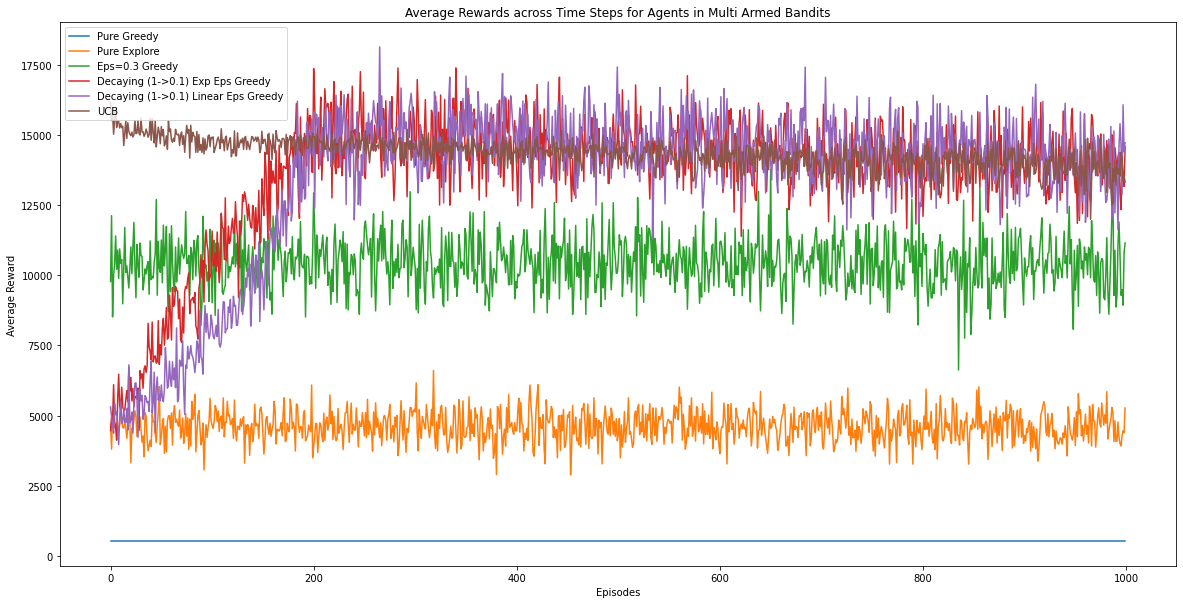

In [27]:
# decaying epsilon greedy, but decays till 200 episodes and constant afterwards
AvgRewardsNGaussianBandits(N=1, episodes=1000, block_type=1)

100%|██████████| 1/1 [03:02<00:00, 182.71s/it]


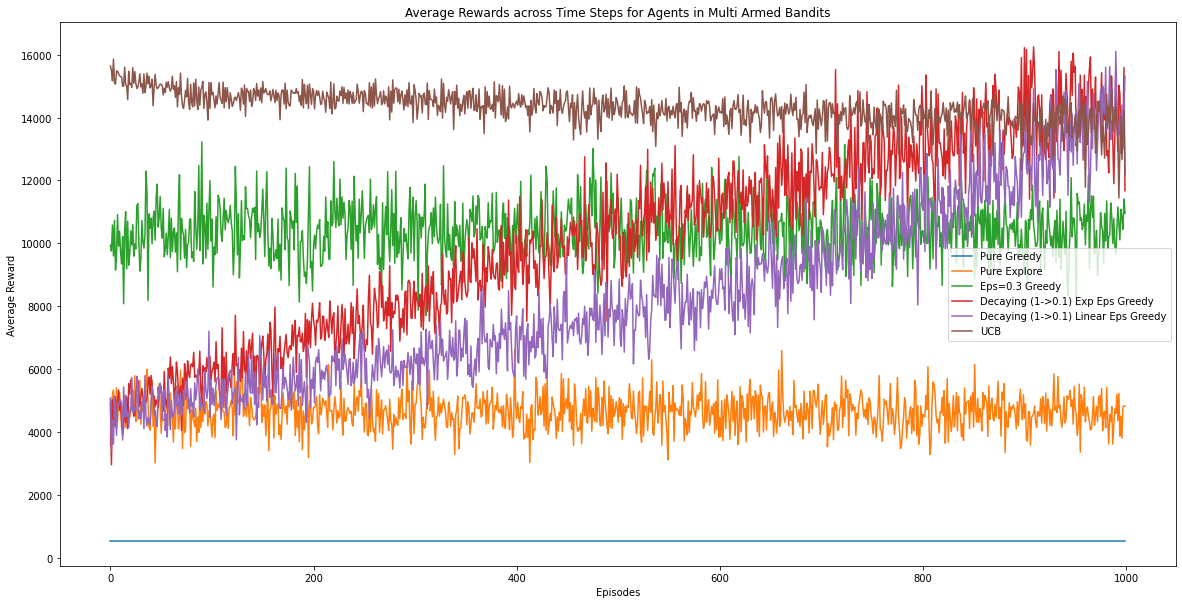

In [32]:
#decaying epsilon greedy, but decays to final value of 0.1 till the last episode
AvgRewardsNGaussianBandits(N=1, episodes=1000, block_type=1, decayTill=1000)

100%|██████████| 25/25 [13:25<00:00, 32.20s/it]


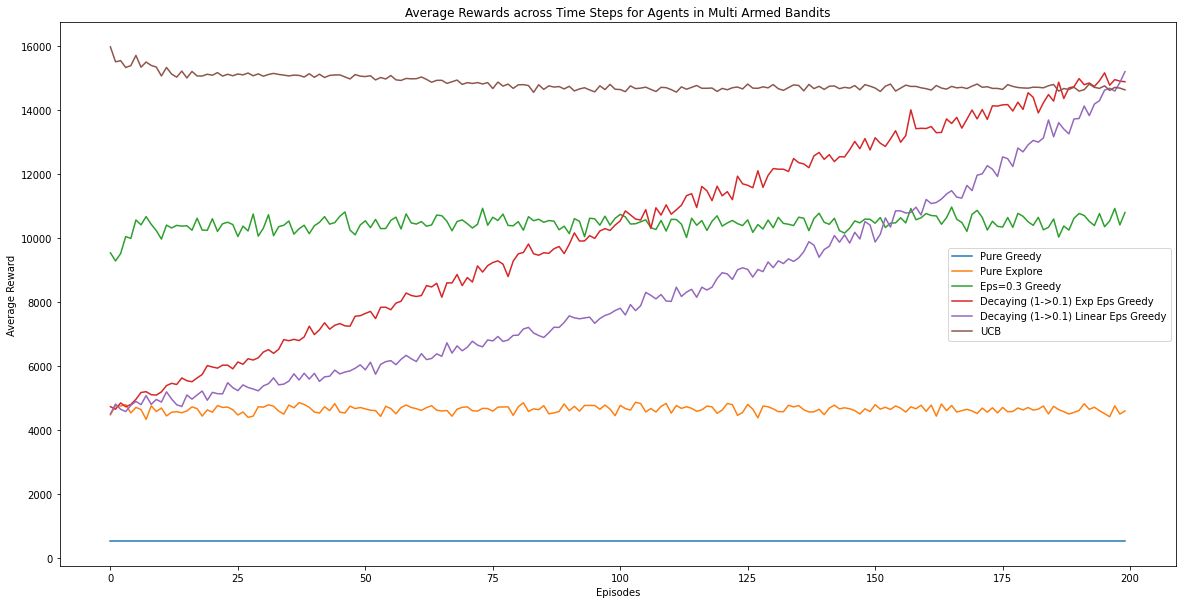

In [33]:
#decaying epsilon greedy, but decays to final value of 0.1 till the last episode
#also averaging
AvgRewardsNGaussianBandits(N=25, episodes=200, block_type=1, decayTill=200)

100%|██████████| 25/25 [09:19<00:00, 22.38s/it]


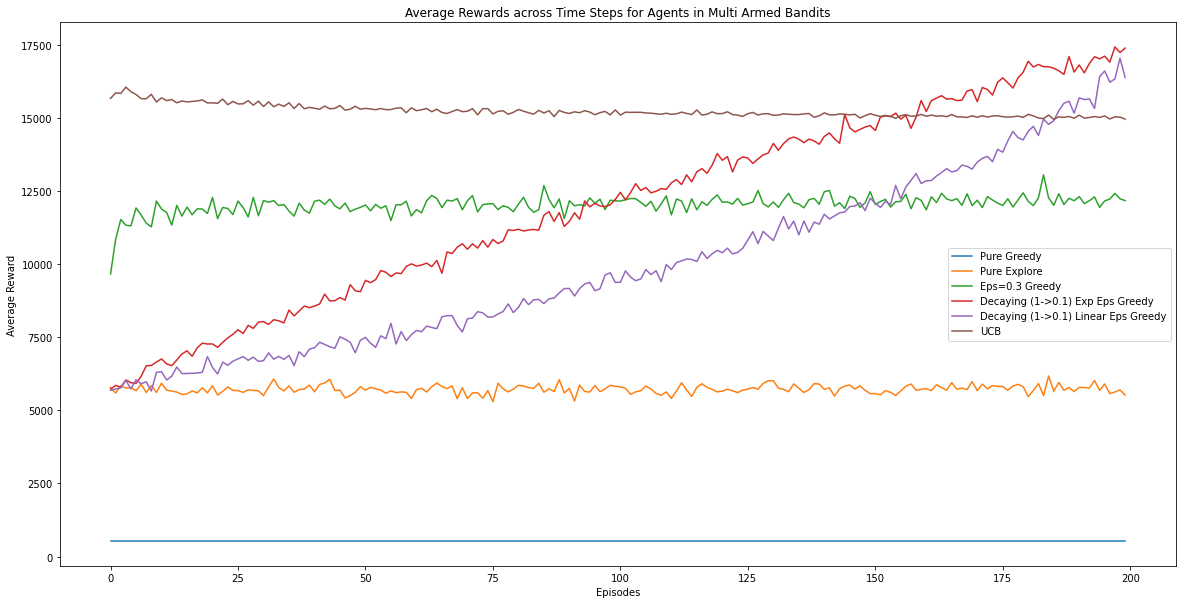

In [12]:
#decaying epsilon greedy, but decays to final value of 0.1 till the last episode
#also averaging
AvgRewardsNGaussianBandits(N=25, episodes=200, block_type=2)

100%|██████████| 25/25 [09:45<00:00, 23.42s/it]


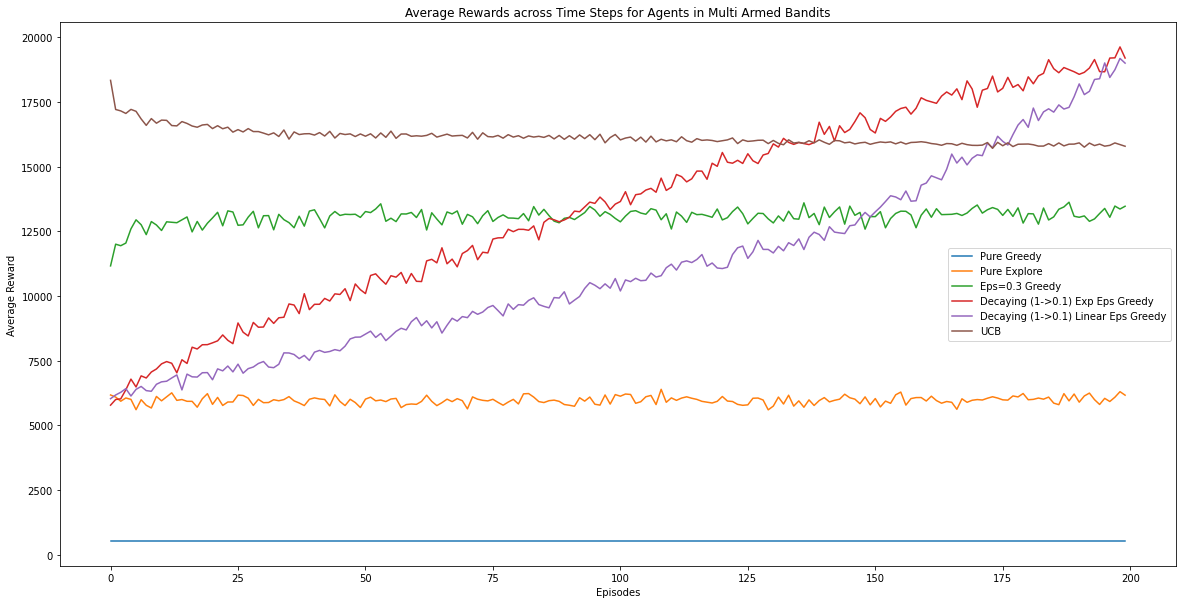

In [13]:
AvgRewardsNGaussianBandits(N=25, episodes=200, block_type=3)

100%|██████████| 10/10 [03:52<00:00, 23.26s/it]


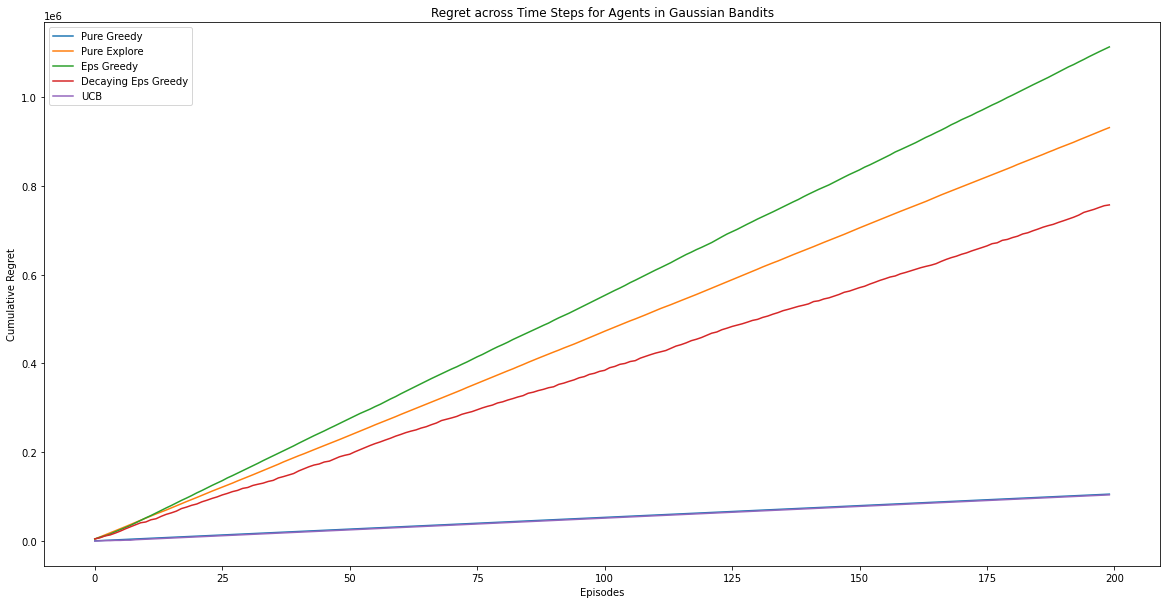

In [24]:
def RegretNGaussianBandits(N=50, episodes=10**3):
    pureGreedy_R = []
    pureExplore_R = []
    epsGreedy_R = []
    decEpsGreedy_R = []
    UCB_R = []
    softMax_R = []

    for i in tqdm(range(N)):
        genv = gym.make('foraging-replenishing-patches-v0')
        _,rs = pureGreedy(env=genv, maxEpisodes = episodes)
        pureGreedy_R.append(rs)
        _,rs = pureExplore(env=genv, maxEpisodes=episodes)
        pureExplore_R.append(rs)
        _,rs = epsGreedy(env=genv, maxEpisodes=episodes, eps=0.3)
        epsGreedy_R.append(rs)
        _,rs = decEpsGreedy(env=genv, maxEpisodes=episodes, eps_start=1, eps_end=0.0)
        decEpsGreedy_R.append(rs)
        _,rs = UCB(env=genv, maxEpisodes=episodes, c=0.5)
        UCB_R.append(rs)
        # _,rs = softMax(env=genv, maxEpisodes=episodes, temp_start=10**2, temp_end=0.01)
        # softMax_R.append(rs)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.title("Regret across Time Steps for Agents in Gaussian Bandits")
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Regret') 
    plt.plot(np.arange(episodes), np.mean(np.cumsum(pureGreedy_R,axis=1),axis=0), label='Pure Greedy')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(pureExplore_R,axis=1),axis=0), label='Pure Explore')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(epsGreedy_R,axis=1),axis=0), label='Eps Greedy')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(decEpsGreedy_R,axis=1),axis=0), label='Decaying Eps Greedy')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(UCB_R,axis=1),axis=0), label='UCB')
    # plt.plot(np.arange(episodes), np.mean(np.cumsum(softMax_R,axis=1),axis=0), label='Soft Max')
    plt.legend()
    plt.show() 

RegretNGaussianBandits(N=10, episodes=200)